## Carry out Visualization for the following questions:

#### 1) Compare churn count with respect to gender. 
#### 2) Find out how many female senior citizens there in the dataset 
#### 3) Compare 'tenure' with 'Total Charges' 
#### 4) Find out which contract preffered by the senior citizen. 
#### 5) Comment on your finds on Payment Method?

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1) Compare churn count with respect to gender 

In [134]:
#importing excel file into python environment
data=pd.read_excel('Telco-Customer-Churn.xlsx')

In [136]:
#display top 5 rows of dataset
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [137]:
#to check null values present in each column
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [61]:
# no null values found

In [62]:
data[['gender','Churn']]

,gender,Churn
0,Female,No
1,Male,No
2,Male,Yes
3,Male,No
4,Female,Yes
...,...,...
7038,Male,No
7039,Female,No
7040,Female,No
7041,Male,Yes


In [63]:
femalecount=(data['gender']=='Female').sum()
malecount=(data['gender']=='Male').sum()
print('Total number of females:',femalecount)
print('Total Number of males:',malecount) 

Total number of females: 3488
Total Number of males: 3555


In [64]:
fcount=((data['gender']=='Female') & (data['Churn']=='Yes')).sum()
mcount=((data['gender']=='Male') & (data['Churn']=='Yes')).sum()

In [65]:
print('Number of Females who changed the current teleco industry:',fcount)
print('Number of Males who changed the current teleco industry :',mcount)

Number of Females who changed the current teleco industry: 939
Number of Males who changed the current teleco industry : 930


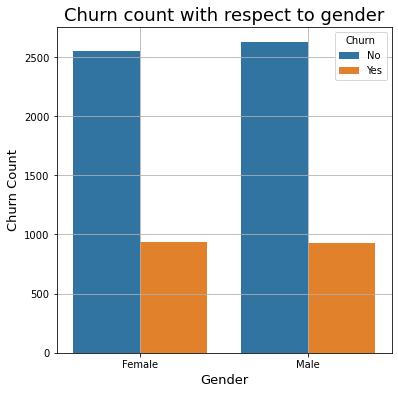

In [66]:
# Compare churn count with respect to gender
plt.figure(figsize= (6,6))
sns.countplot(x='gender',hue='Churn',data=data)
plt.xlabel("Gender", fontsize= "13")
plt.ylabel("Churn Count",fontsize= "13")
plt.title("Churn count with respect to gender",fontsize= "18")
plt.grid()
plt.show()

DATA INSIGHT:




 * Majority of female and male customers decided to stay with in the same telco company

###  2. Find out how many female senior citizens there in the dataset

In [67]:
data['SeniorCitizen'].sum()

1142

In [94]:
#create a data frame with only senior citizen=1
femaleseniorcitizen=data.iloc[np.where(data.SeniorCitizen.values==1)]

In [138]:
#female senior citizen present
femaleseniorcitizen.gender.value_counts().Female

568

<function matplotlib.pyplot.show(close=None, block=None)>

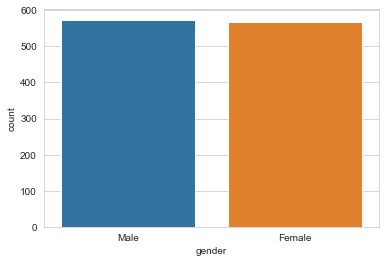

In [97]:
sns.set_style('whitegrid')
sns.countplot(x="gender",data=femaleseniorcitizen)
plt.show

Female senior citizen=568

### 3) Compare 'tenure' with 'Total Charges' 

In [141]:
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],downcast='float',errors='coerce')
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float32
Churn                object
dtype: object

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [143]:
data['TotalCharges'].fillna(data['TotalCharges'].mean(),inplace=True)
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


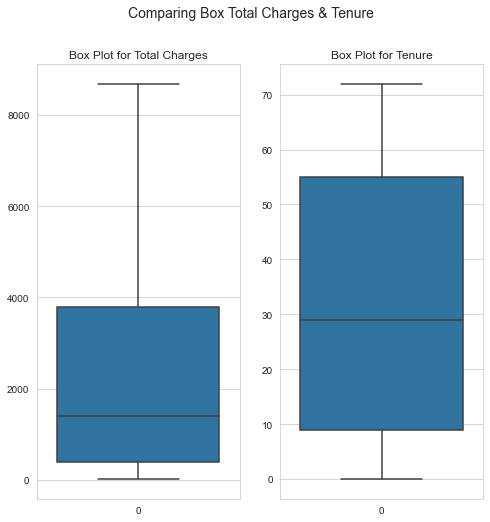

In [144]:
#box plot of Total Charges & Tenure
fig, axes = plt.subplots(1,2,figsize=(8,8))
fig.suptitle('Comparing Box Total Charges & Tenure ',fontsize = 14)
axes[0].set_title('Box Plot for Total Charges')
axes[1].set_title('Box Plot for Tenure')
sns.boxplot(ax = axes[0], data = data['TotalCharges'])
sns.boxplot(ax = axes[1], data = data['tenure'])
plt.show()


### 4) Find out which contract preffered by the senior citizen 

In [139]:
#total number of senior citizen
data['SeniorCitizen'].sum()

1142

In [25]:
data.loc[data['SeniorCitizen']==1,['Contract']].value_counts()

Contract      
Month-to-month    807
One year          190
Two year          145
dtype: int64

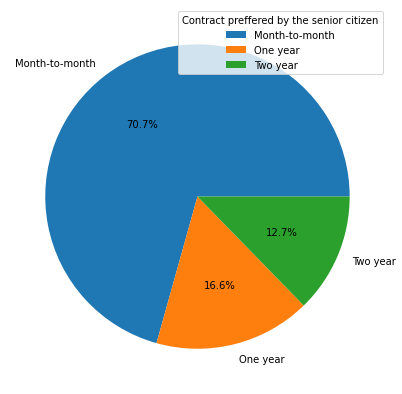

In [32]:
#plot of contract prefferd by the senior citizen
fig=plt.figure(figsize=(10,7))
labels=["Month-to-month","One year","Two year"]
plt.pie(data.loc[data['SeniorCitizen']==1,['Contract']].value_counts(),autopct="%1.1f%%", labels = labels)
plt.legend(title="Contract preffered by the senior citizen")
plt.show()

Out of 1142 senior citizens, 807 chosen Month-to-month  ,190 chosen one year and 145 chosen two year. Most of the senior citizen chosen month-to-month contract . 


### 5) Comment on your finds on Payment Method? 

In [34]:
data['PaymentMethod'].value_counts().to_frame()

,PaymentMethod
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522


Text(0, 0.5, 'no.of customers')

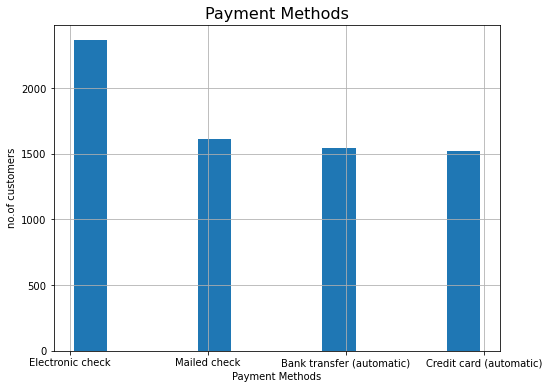

In [35]:
plt.figure(figsize = (8, 6))
(data['PaymentMethod']).hist(rwidth=0.8)
plt.title("Payment Methods",fontsize=16)
plt.xlabel('Payment Methods')
plt.ylabel('no.of customers')


Data insights

* Most widely used payment method is electronic check and the least is credit card